# T3 Multiclass Classification using Logistic regression (Iris data)

## 1. Setup

In [23]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 2. Fetch, Load and Visualize data

### 2.1 Load data from .CSV file

In [ ]:
iris = pd.read_csv("C:\\Users\\Rove Labs\\Desktop\\iris.csv")

In [38]:
iris.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SL        150 non-null float64
SW        150 non-null float64
PL        150 non-null float64
PW        150 non-null float64
target    150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [40]:
iris.describe()

,SL,SW,PL,PW,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 2.3 Visualize Dataset

In [42]:
import pandas as pd

setosa = iris[iris['target'].isin([0])]
versicolor = iris[iris['target'].isin([1])]
virginica = iris[iris['target'].isin([2])]

Saving figure T3. Iris plot


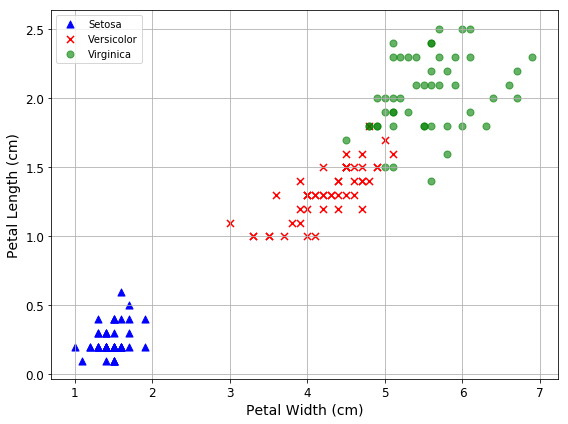

In [43]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(setosa['PL'], setosa['PW'], 
           s=50, c='b', marker='^', label='Setosa')
ax.scatter(versicolor['PL'], versicolor['PW'], 
           s=50, c='r', marker='x', label='Versicolor')
ax.scatter(virginica['PL'], virginica['PW'], 
           s=50, c='g', marker='o', label='Virginica', alpha = 0.6)
ax.legend()
ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.grid()
plt.show()

###  2.3 Prepare dataset

In [44]:
X = iris.iloc[:,[2,3]].values
y = iris.iloc[:, 4].values.astype(np.int)

## 3. Training Model : Logistic Regression 

### 3.1 Softmax Regression

In [45]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

###  3.2 Visualize Decision Boundary (Multiclass)

Saving figure softmax_regression_contour_plot


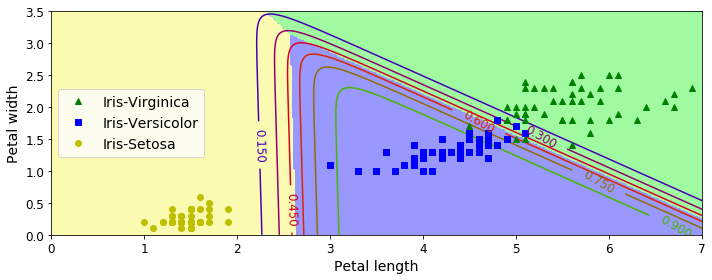

In [46]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

###  3.3 Predicition with model

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

### 4. Model Evalution

#### 4.1 Confusion Matrix

In [ ]:
y_pred = softmax_reg.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

#### 4.2 Performance Measure  

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy  :", accuracy_score(y, y_pred))
print("Pricision :", precision_score(y, y_pred, average = 'weighted'))
print("Recall    :", recall_score(y, y_pred, average = 'weighted'))
print("f1_score  :", f1_score(y, y_pred, average = 'weighted'))

#### 4.5  Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))